## Problem Statement
#### Predict the house prices

### DATA DESCRIPTION: 

* The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset is a portion of a larger dataset that consisted of 21 variables and 21613 observations.

### ATTRIBUTES: 

1. id=  It is the unique numeric number assigned to each house being sold. 
2. date=  It is the date on which the house was sold out.
3. price= It is the price of house which we have to predict so this is our target variable and aprat from It are our features. 
4. bedrooms= It determines number of bedrooms in a house. 
5. bathrooms= It determines number of bathrooms in a bedroom of a house. 
6. sqft_living= It is the measurement variable which determines the measurement of house in square foot. 
7. sqft_lot= It is also the measurement variable which determines square foot of the lot. 
8. floors= It determines total floors means levels of house. 
9. waterfront= This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
10. view= This feature determines whether a house has been viewed or not 0 means no 1 means yes. 
11. condition= It determines the overall condition of a house on a scale of 1 to 5. 
12. grade=  It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11 sqft_above= It determines square footage of house apart from basement.
12. sqft_basement= It determines square footage of the basement of the house. 
13. yr_built= It detrmines the date of building of the house. 
14. yr_renovated= It detrmines year of renovation of house. 
15. zipcode= It determines the zipcode of the location of the house. 
16. lat= It determines the latitude of the location of the house. 
17. long= It determines the longitude of the location of the house. 
18. sqft_living15= Living room area in 2015(implies-- some renovations) 
19. sqft_lot15= lotSize area in 2015(implies-- some renovations) 

#### Import Libraries

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import *
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import *

In [2]:
from sklearn.preprocessing import *

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print("There are ",data.shape[0]," rows and ",data.shape[1]," columns")

There are  21613  rows and  21  columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
def num_cols(df):
    num=df.select_dtypes(include='number').columns.to_list()
    return num

In [8]:
def cat_cols(df):
    cat=df.select_dtypes(include='object').columns.to_list()
    return cat
    

In [9]:
print("There are  ", len(num_cols(data)),"  numerical columns and ",len(cat_cols(data))," categorical columns")

There are   20   numerical columns and  1  categorical columns


In [10]:
##dropping the id,zipcode and date columns
data.drop(['id','date','zipcode'],axis=1,inplace=True)

In [11]:
data.shape

(21613, 18)

In [12]:
## All the column are numerical columns

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.312543,0.865405,0.0000,2.000,2.0000,3.000,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


* The price column is rightly skewed
* The no of bedrooms range between 0-10
* The maximum number of bathrooms is 8 ,but 75% of the houses have less than 3 bathrooms
* The houses have maximum of upto 3 floors with 75% of the houses with 2 floors or less
* Half of the houses are rated 3 and below

In [14]:
## Changing the latitude and longitude to object type
data['lat']=data['lat'].astype('object')
data['long']=data['long'].astype('object')

In [15]:
data.duplicated().sum()

5

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
 #Checking for missing values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
#### The column sqft above is having two missing values

In [19]:
### Trying to fill the missing value in sqft_above with median value of grouping lat and long
data['sqft_above'] = data.groupby(['lat','long'])[['sqft_above']].transform(lambda x: x.fillna(x.median()))

In [20]:
data['sqft_above'].isnull().sum()

2

In [21]:
## the missing value is not filled 
## let us analyse why??
gb=data.groupby(['lat','long'])[['sqft_above']].median()
gb

sqft_above
lat     long                
47.1559 -121.646      1860.0
47.1593 -121.957      4400.0
47.1622 -121.971      2350.0
47.1647 -121.973      2030.0
47.1764 -122.026      1670.0
...                      ...
47.7775 -122.337      1060.0
        -122.336       760.0
47.7776 -122.384      1400.0
        -122.375      1580.0
        -122.352      1900.0

[20832 rows x 1 columns]

In [22]:
## checking if the null values lat and long has some entry in group by
## finding the index of the null values and adding it in the list
lst1=data[data['sqft_above'].isna()].index

##for those null indices , we find the lat and long value and pass it as index to the group by data frame
for i in range(0,len(lst1)):
    lat=data.loc[lst1[i]][['lat']][0]
    long=data.loc[lst1[i]][['long']][0]
    #print(type(lat),type(long))
    print(lat,long)
    print(gb.loc[lat,long])

47.6007 -122.145
sqft_above   NaN
Name: (47.6007, -122.145), dtype: float64
47.6648 -122.343
sqft_above   NaN
Name: (47.6648, -122.343), dtype: float64


In [23]:
##The lat and long combo does not have entry in the group by table so the null values are not filled
## hence filling the null values with simply median , since the sqft_above column is skewed

In [24]:
data['sqft_above'].fillna(data['sqft_above'].median(),inplace=True)
data['sqft_above'].isnull().sum()

0

In [25]:
## now the missing values are filled
data_copy=data.copy()

In [26]:
data_copy.shape

(21608, 18)

In [27]:
data['view'].value_counts()
##The data description says that view 0  means the house has not been viewed
## and view 1 means the house has been viewed.but in values it has 0 -4.
## Since there is a discrepenacy , we drop this column

view
0    19485
2      963
3      509
1      332
4      319
Name: count, dtype: int64

In [28]:
data.drop(columns=['view'],inplace=True)

In [29]:
data.shape

(21608, 17)

In [30]:
## The column is dropped

In [31]:
len(data['lat'].unique())

5034

In [32]:
len(data['long'].unique())

752

In [33]:
num_cols(data)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

In [34]:
num=['price', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 
     'sqft_basement','sqft_living15','sqft_lot15']
## considering only the above columns for univariate numeric analysis

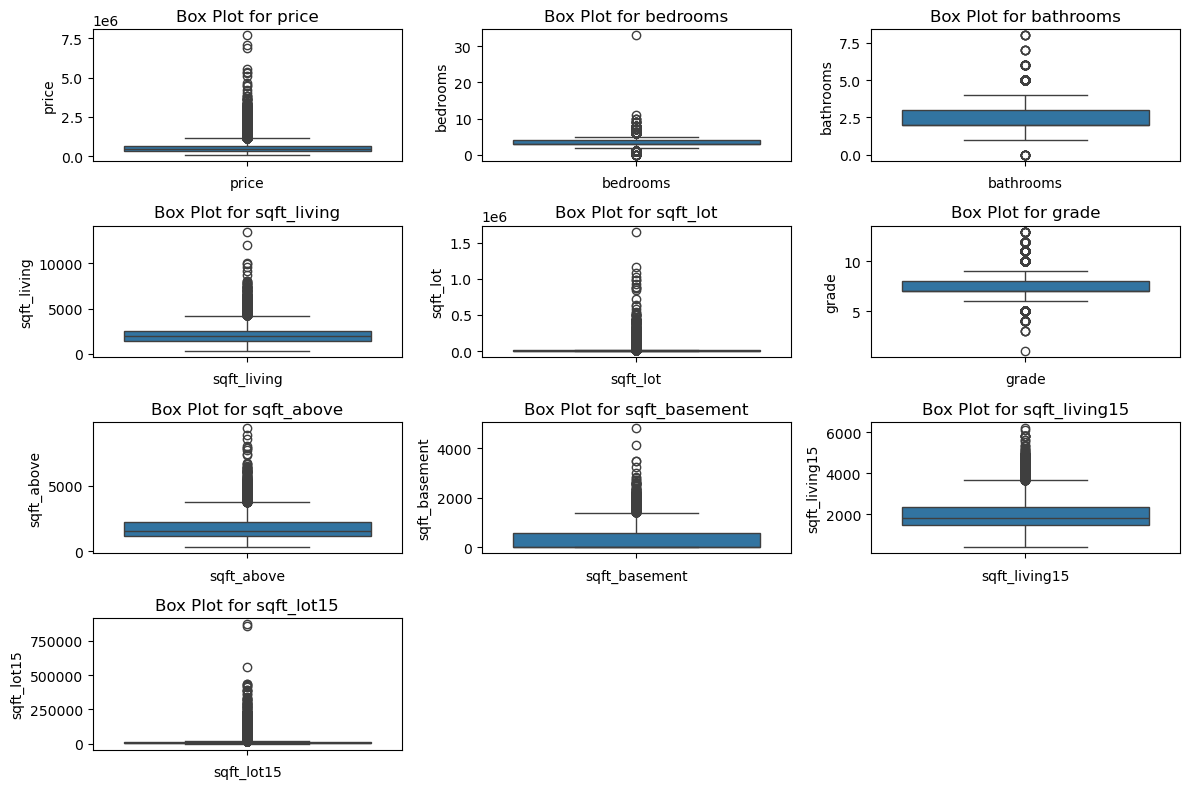

In [35]:
plt.figure(figsize=(12,8))
t=1
for i in num:
    plt.subplot(4,3,t)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.title(f'Box Plot for {i}')
    t+=1
plt.tight_layout()
plt.show()

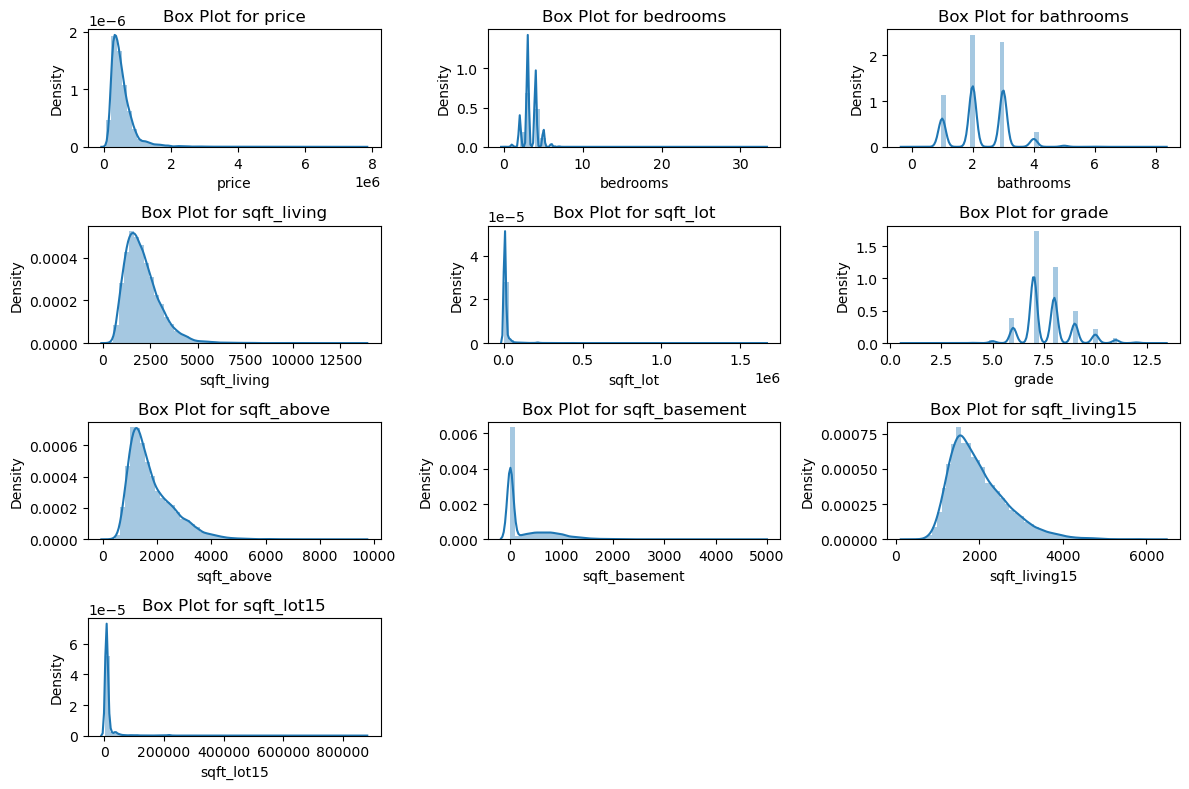

In [36]:
plt.figure(figsize=(12,8))
t=1
for i in num:
    plt.subplot(4,3,t)
    sns.distplot(data[i])
    plt.xlabel(i)
    plt.title(f'Box Plot for {i}')
    t+=1
plt.tight_layout()
plt.show()

In [37]:
cat_cols(data)
cat=['grade','condition','waterfront','bedrooms','bathrooms']
cat

['grade', 'condition', 'waterfront', 'bedrooms', 'bathrooms']

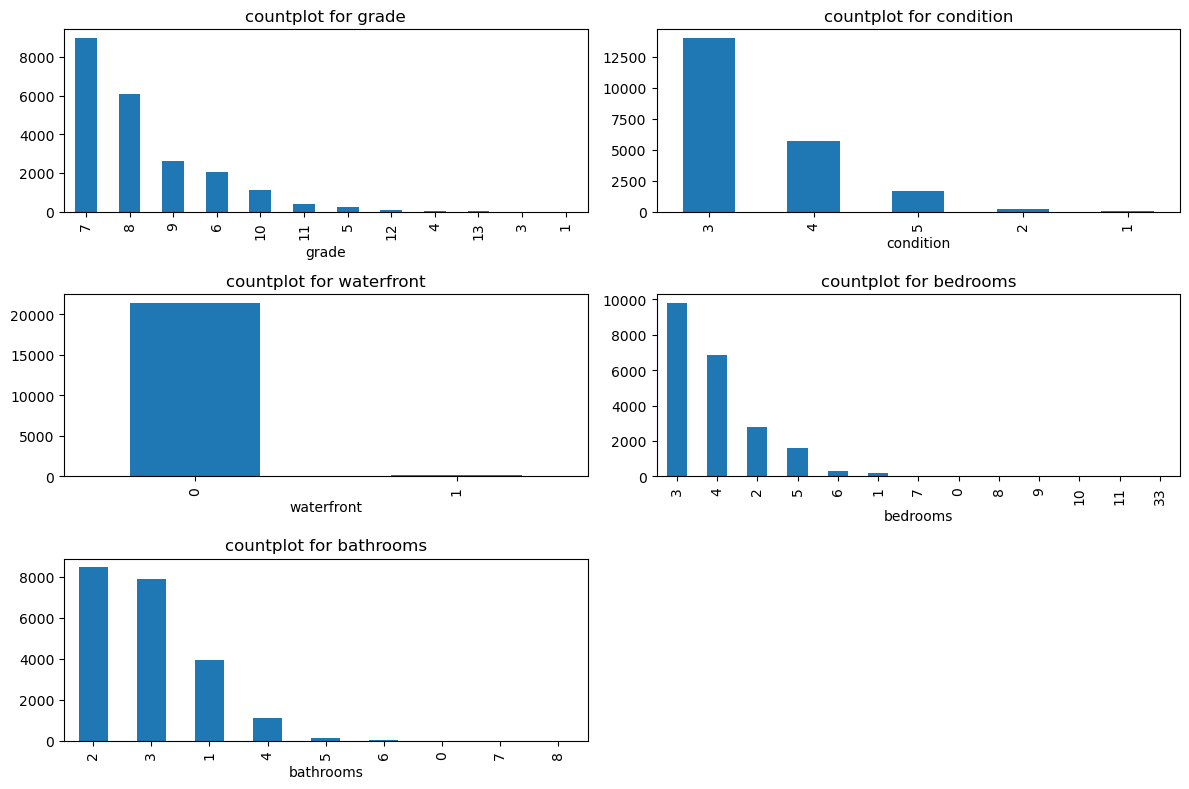

In [38]:
plt.figure(figsize=(12,8))
t=1
for i in cat:
    plt.subplot(3,2,t)
    data[i].value_counts().plot(kind='bar')
    plt.title(f'countplot for {i}')
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

In [39]:
## Changing the latitude and longitude to float type for bivariate analysis
data['lat']=data['lat'].astype('float64')
data['long']=data['long'].astype('float64')

In [40]:
## bivariate analysis
num=num_cols(data)
num

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

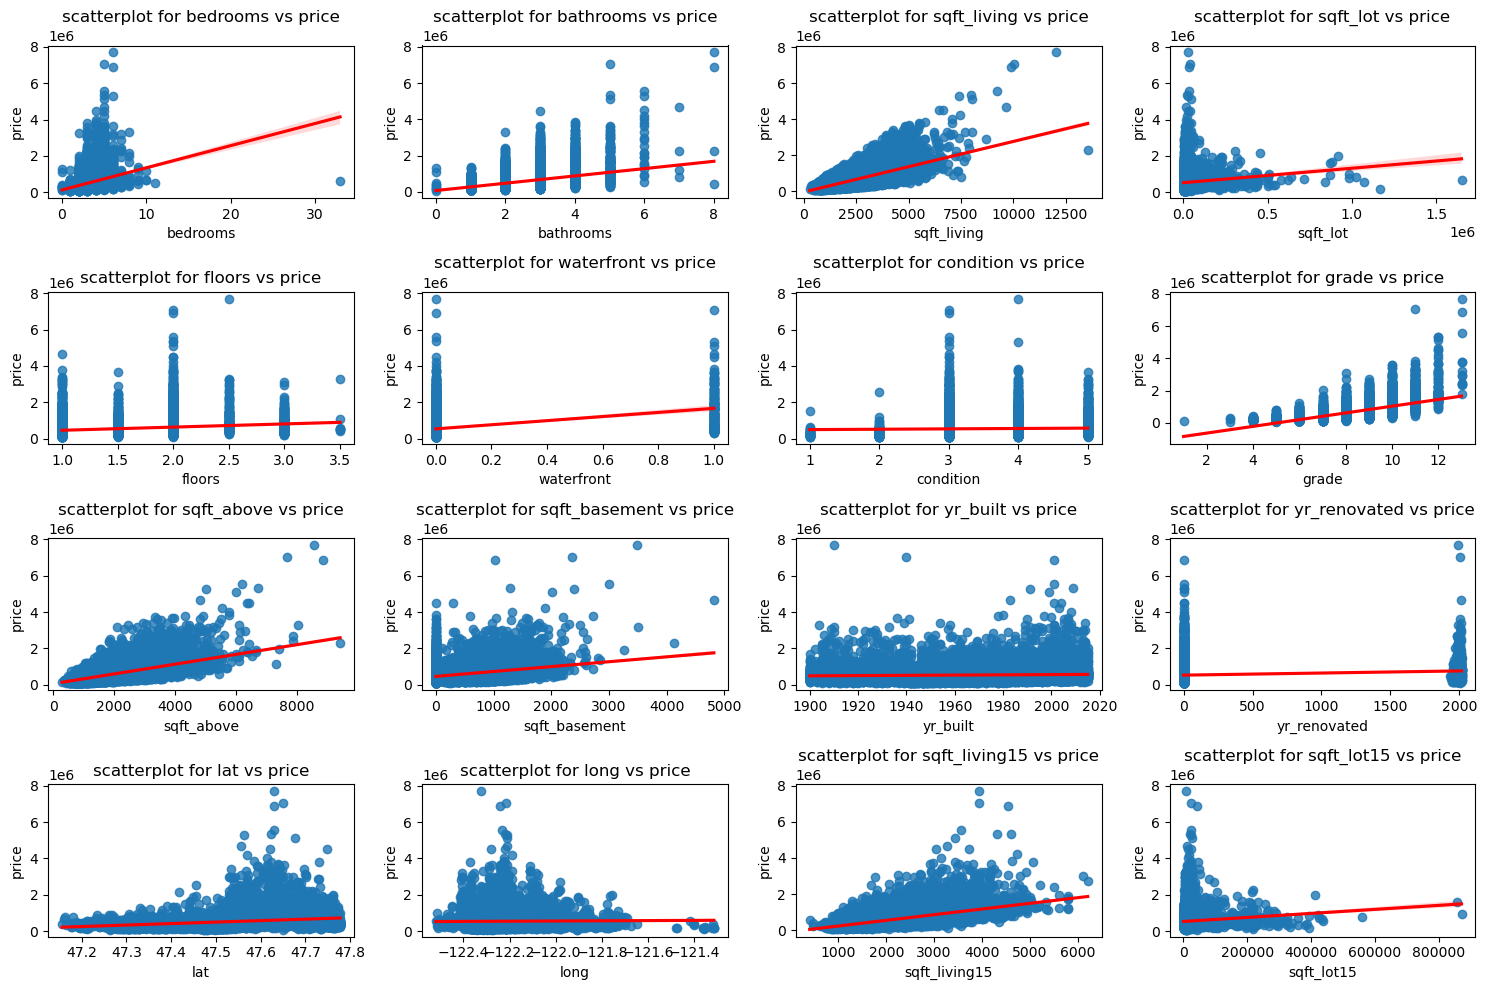

In [41]:
plt.figure(figsize=(15,10))
t=1
for i in num:
    if(i!='price'):
        plt.subplot(4,4,t)
        sns.regplot(x=data[i],y=data['price'],line_kws={'color':'red'})
        plt.xlabel(i)
        plt.title(f'scatterplot for {i} vs price')
        t+=1
plt.tight_layout()
plt.show()

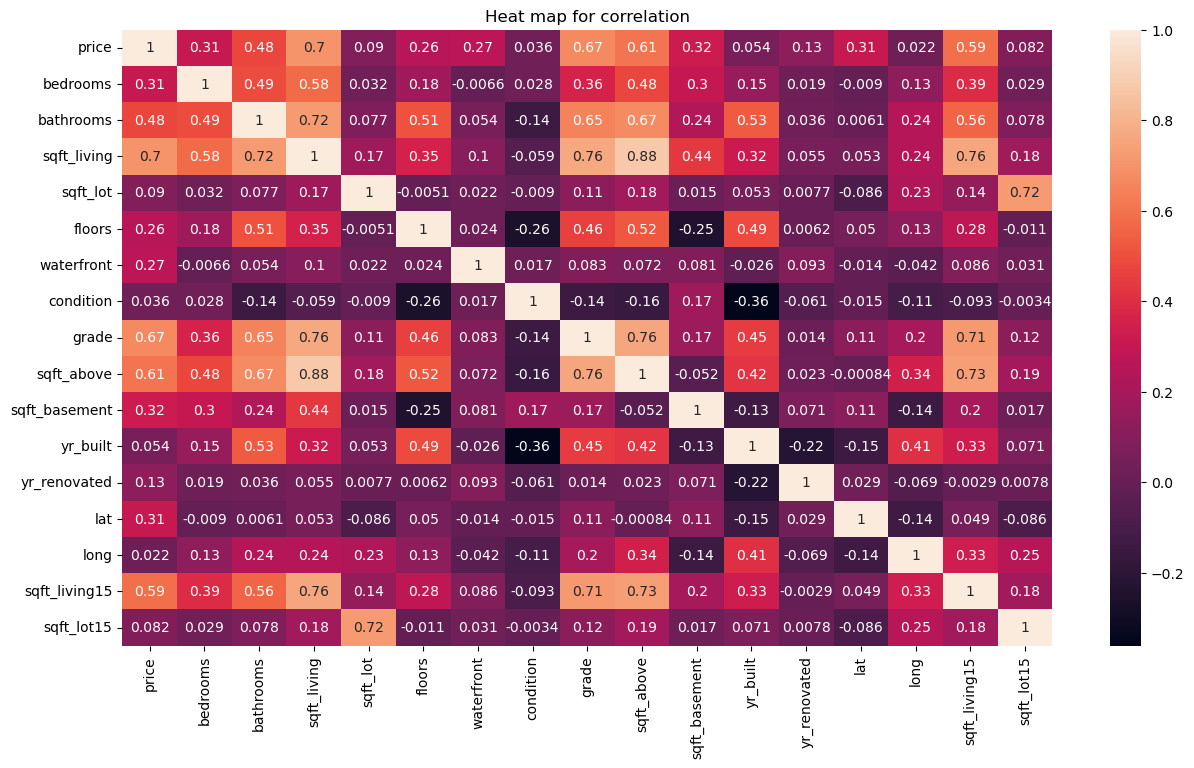

In [42]:
## multivariate analysis
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Heat map for correlation')
plt.show()

In [43]:
## The number of bedrooms,number of bathrooms,sqft_living ,grade,sft_living15 have positive coreleation with the target column

#### statistical test for Lat and Price(target)

In [44]:
#Framing Hypothesis

# Ho:The Lat and Price column has no significant relationship
# Ha:The Lat and Price column has significant relationship
sigval=0.05 ##(confidence level is 95%)
stat,pval=stats.pearsonr(data['lat'],data['price'])
if pval<sigval:
    print("reject H0 , hence the Lat and Price column has significant relationship",)
else:
    print("fail to reject Ho, hence the Lat and Price column has no significant relationship")

reject H0 , hence the Lat and Price column has significant relationship


#### statistical test for long and price

In [45]:
#Framing Hypothesis

#Framing Hypothesis

# Ho:The Long and Price column has no significant relationship
# Ha:The Long and Price column has significant relationship
sigval=0.05 ##(confidence level is 95%)
stat,pval=stats.pearsonr(data['long'],data['price'])

if pval<sigval:
    print("reject H0,hence the Long and Price column has significant relationship",)
else:
    print("fail to reject Ho, hence the Long and Price column has no significant relationship")

reject H0,hence the Long and Price column has significant relationship


In [46]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1.0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,3,1530,1131,3.0,0,3,8,1530.0,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,3,2310,5813,2.0,0,3,8,2310.0,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,1,1020,1350,2.0,0,3,7,1020.0,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,3,1600,2388,2.0,0,3,8,1600.0,0,2004,0,47.5345,-122.069,1410,1287


In [47]:
data.shape

(21608, 17)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  int64  
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   condition      21608 non-null  int64  
 8   grade          21608 non-null  int64  
 9   sqft_above     21608 non-null  float64
 10  sqft_basement  21608 non-null  int64  
 11  yr_built       21608 non-null  int64  
 12  yr_renovated   21608 non-null  int64  
 13  lat            21608 non-null  float64
 14  long           21608 non-null  float64
 15  sqft_living15  21608 non-null  int64  
 16  sqft_lot15     21608 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 3.5 MB


## Feature Engineering

* we can create a new column as the year renovated - the current year
* converting the year_renovated to int and calculating the new column

In [49]:
data['time_since_renovation']=2024-data['yr_renovated']
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,time_since_renovation
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2024
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639,33
2,180000.0,2,1,770,10000,1.0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,2024
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,2024
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,2024


In [50]:
data['time_since_renovation'].corr(data['price'])
##The negative correlation value shows that the less the time of renovation , greater the price

-0.12649774478882947

In [51]:
### dropping the two columns yr_built and yr_renovated
data.drop(columns=['yr_built','yr_renovated'],inplace=True)

## Data Preprocessing

* Encoding is not required for the columns - waterfront,condition,grade,since it is already given in integer values
* scaling can be done for the other numerical columns after train,test split
* The column waterfront is excluded from scaling as the column has only 0 and 1
* Condition and grade columns can be scaled 

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21608 non-null  float64
 1   bedrooms               21608 non-null  int64  
 2   bathrooms              21608 non-null  int64  
 3   sqft_living            21608 non-null  int64  
 4   sqft_lot               21608 non-null  int64  
 5   floors                 21608 non-null  float64
 6   waterfront             21608 non-null  int64  
 7   condition              21608 non-null  int64  
 8   grade                  21608 non-null  int64  
 9   sqft_above             21608 non-null  float64
 10  sqft_basement          21608 non-null  int64  
 11  lat                    21608 non-null  float64
 12  long                   21608 non-null  float64
 13  sqft_living15          21608 non-null  int64  
 14  sqft_lot15             21608 non-null  int64  
 15  time_si

* All the columns are in numerical type hence we need not do encoding

In [53]:
#### separating the independent columns and dependent columns
x=data.drop(columns='price')
y=data['price']

In [54]:
x.shape,y.shape

((21608, 15), (21608,))

In [55]:
#### perform train test split with 70:30 ratio
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((15125, 15), (6483, 15), (15125,), (6483,))

In [56]:
## scaling the numerical columns except the waterfront column, since it is already in 0 and 1
num=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition','grade', 'sqft_above', 'sqft_basement',
       'lat','long','sqft_living15', 'sqft_lot15', 'time_since_renovation']

In [57]:
ss=StandardScaler()
xtrain[num]=ss.fit_transform(xtrain[num])
xtrain.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,time_since_renovation
4103,-0.388133,-0.360364,-0.152461,-0.087942,-0.916497,0,0.914005,0.284123,-0.830974,1.243214,-0.421965,-0.111755,0.275469,-0.141898,0.208472
3415,-1.450092,-0.360364,0.031837,-0.135530,-0.916497,0,-2.166968,-0.560153,0.384404,-0.655709,1.373503,-0.650093,-0.736935,-0.122388,0.208472
14976,-1.450092,-1.509292,-1.366664,-0.206447,-0.916497,0,0.914005,-0.560153,-1.167910,-0.655709,-0.073849,-1.167181,-0.722472,-0.230088,0.208472
18401,-1.450092,0.788563,-0.857132,-0.319108,2.773891,0,-0.626481,0.284123,-0.602338,-0.655709,0.976998,-1.145931,-0.751398,-0.399183,0.208472
9701,-1.450092,-1.509292,-1.160683,-0.233731,-0.916497,0,-0.626481,-0.560153,-0.939275,-0.655709,-1.037306,-0.770511,-0.592306,-0.192105,0.208472


In [58]:
xtest[num]=ss.transform(xtest[num])
xtest.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,time_since_renovation
20512,0.673826,0.788563,0.160847,-0.221839,0.928697,0,-0.626481,-0.560153,0.527602,-0.655709,-1.378921,-0.508425,1.082500,-0.252809,0.208472
18171,-0.388133,-0.360364,-1.008908,-0.050062,-0.916497,0,2.454491,-0.560153,-0.770806,-0.655709,0.564604,1.737011,-0.621232,-0.022906,0.208472
10364,0.673826,-0.360364,-0.087415,-0.261015,0.006100,0,2.454491,-0.560153,-0.409803,0.587634,0.040986,-1.138848,-0.809250,-0.312961,0.208472
5587,-0.388133,-0.360364,0.075202,-0.038443,-0.916497,0,0.914005,0.284123,-0.217268,0.565028,1.436337,-0.572176,0.232080,0.083447,0.208472
20918,-1.450092,-0.360364,-1.063113,-0.326793,2.773891,0,-0.626481,0.284123,-0.830974,-0.655709,0.709050,-0.961763,-1.272063,-0.356124,0.208472


## Model Building

#### OLS Model

In [59]:
xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)
model1=sm.OLS(ytrain,xtrain_c).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     2078.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:29:50   Log-Likelihood:            -2.0686e+05
No. Observations:               15125   AIC:                         4.137e+05
Df Residuals:                   15109   BIC:                         4.139e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.364e+05   1719.997    311.886      0.000    5.33e+05     5.4e+05
bedrooms              -2.685e+04   2175.975    -12.340      0.000   -3.11e+04   -2.26e+04
bathrooms             -1.302e+04   2820.105     -4.615      0.000   -1.85e+04   -7487.748
sqft_living           -3.732e+05   6.42e+05     -0.581      0.561   -1.63e+06    8.86e+05
sqft_lot               1.178e+04   2455.855      4.798      0.000    6969.074    1.66e+04
floors                -5669.1179   2362.580     -2.400      0.016   -1.03e+04   -1038.175
waterfront             7.792e+05   1.97e+04     39.464      0.000    7.41e+05    8.18e+05
condition              3.776e+04   1806.845     20.896      0.000    3.42e+04    4.13e+04
grade                  1.053e+05   3096.150     34.005      0.000    9.92e+04    1.11e+05
sqft_above             4.981e+05   5.79e+05      0.861      0.389   -6.36e+05    1.63e+06
sqft_basement           2.64e+05   3.08e+05      0.857      0.392    -3.4e+05    8.68e+05
lat                    8.582e+04   1772.956     48.402      0.000    8.23e+04    8.93e+04
long                  -3.777e+04   1975.603    -19.119      0.000   -4.16e+04   -3.39e+04
sqft_living15          3.131e+04   2949.102     10.618      0.000    2.55e+04    3.71e+04
sqft_lot15            -1.222e+04   2478.792     -4.931      0.000   -1.71e+04   -7364.126
time_since_renovation -2.636e+04   1737.226    -15.172      0.000   -2.98e+04    -2.3e+04
==============================================================================
Omnibus:                    11601.518   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           763261.383
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      37.231   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
data_copy=data.copy()

In [61]:
viflist=[]
for i in range(xtrain.shape[1]):
    viflist.append(variance_inflation_factor(xtrain.values,i))
    
pd.DataFrame(viflist,index=xtrain.columns,columns=['VIF'])

,VIF
bedrooms,1.613560
bathrooms,2.710393
sqft_living,140640.245883
sqft_lot,2.055452
floors,1.902282
waterfront,1.036833
condition,1.112609
grade,3.266976
sqft_above,114164.377363
sqft_basement,32359.061545


In [62]:
## dropping the columns ,sqft living and sqft_above and sqft_basement
x=data.drop(columns=['price','sqft_living','sqft_above','sqft_basement'])
y=data['price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
ss=StandardScaler()
num=num_cols(xtrain)
xtrain[num]=ss.fit_transform(xtrain[num])
xtest[num]=ss.transform(xtest[num])
xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)
model2=sm.OLS(ytrain,xtrain_c).fit()
model2.summary()

(15125, 12) (6483, 12) (15125,) (6483,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2089.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:29:51   Log-Likelihood:            -2.0793e+05
No. Observations:               15125   AIC:                         4.159e+05
Df Residuals:                   15112   BIC:                         4.160e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.426e+05   1838.211    295.164      0.000    5.39e+05    5.46e+05
bedrooms               1.236e+04   2163.320      5.712      0.000    8117.380    1.66e+04
bathrooms              3.449e+04   2801.279     12.314      0.000     2.9e+04       4e+04
sqft_lot                1.93e+04   2629.448      7.338      0.000    1.41e+04    2.44e+04
floors                 -1.18e+04   2268.355     -5.202      0.000   -1.62e+04   -7354.252
waterfront             7.548e+04   1865.112     40.469      0.000    7.18e+04    7.91e+04
condition              4.358e+04   1925.901     22.627      0.000    3.98e+04    4.74e+04
grade                  1.587e+05   3072.377     51.658      0.000    1.53e+05    1.65e+05
lat                    8.723e+04   1889.710     46.160      0.000    8.35e+04    9.09e+04
long                  -4.144e+04   2056.642    -20.148      0.000   -4.55e+04   -3.74e+04
sqft_living15          8.826e+04   2862.168     30.835      0.000    8.26e+04    9.39e+04
sqft_lot15            -5375.7311   2655.062     -2.025      0.043   -1.06e+04    -171.488
time_since_renovation -3.203e+04   1859.849    -17.220      0.000   -3.57e+04   -2.84e+04
==============================================================================
Omnibus:                    13646.763   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1583208.276
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      52.514   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Type your answer
mod=[]
r2=[]
mse=[]
rmse=[]
mae=[]
mape=[]

def model_score(model,xtrain,xtest,ytrain,ytest):
    
    m1=model.fit(xtrain,ytrain)
    ypred=m1.predict(xtest)
    
    mod.append(str(model))
    r2.append(r2_score(ytest,ypred))
    mse.append(mean_squared_error(ytest,ypred))
    rmse.append(np.sqrt(mean_squared_error(ytest,ypred)))
    mae.append(mean_absolute_error(ytest,ypred))
    mape.append(mean_absolute_percentage_error(ytest,ypred))
    
    global scorecard
    scorecard=pd.DataFrame({'model':mod,'r2_score':r2,'mse_score':mse,'rmse_score':rmse,
                  'mae_score':mae,'mape_score':mape}
                  )
    return scorecard

In [65]:
model_score(LinearRegression(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888


In [66]:
model_score(RandomForestRegressor(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888
1,RandomForestRegressor(),0.850053,1.995145e+10,141249.599399,76034.535662,0.144706


In [67]:
from sklearn.tree import DecisionTreeRegressor
model_score(DecisionTreeRegressor(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888
1,RandomForestRegressor(),0.850053,1.995145e+10,141249.599399,76034.535662,0.144706
2,DecisionTreeRegressor(),0.733800,3.541959e+10,188200.941159,104318.174456,0.195972


In [68]:
model_score(AdaBoostRegressor(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888
1,RandomForestRegressor(),0.850053,1.995145e+10,141249.599399,76034.535662,0.144706
2,DecisionTreeRegressor(),0.733800,3.541959e+10,188200.941159,104318.174456,0.195972
3,AdaBoostRegressor(),-0.151023,1.531511e+11,391345.287112,359178.704503,0.955298


In [79]:
from sklearn.linear_model import Ridge
model_score(Ridge(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888
1,RandomForestRegressor(),0.850053,1.995145e+10,141249.599399,76034.535662,0.144706
2,DecisionTreeRegressor(),0.733800,3.541959e+10,188200.941159,104318.174456,0.195972
3,AdaBoostRegressor(),-0.151023,1.531511e+11,391345.287112,359178.704503,0.955298
4,Ridge(),0.592761,5.418575e+10,232778.332875,140040.867395,0.289880


In [80]:
from sklearn.linear_model import Lasso
model_score(Lasso(),xtrain,xtest,ytrain,ytest)

,model,r2_score,mse_score,rmse_score,mae_score,mape_score
0,LinearRegression(),0.592762,5.418571e+10,232778.242839,140043.027614,0.289888
1,RandomForestRegressor(),0.850053,1.995145e+10,141249.599399,76034.535662,0.144706
2,DecisionTreeRegressor(),0.733800,3.541959e+10,188200.941159,104318.174456,0.195972
3,AdaBoostRegressor(),-0.151023,1.531511e+11,391345.287112,359178.704503,0.955298
4,Ridge(),0.592761,5.418575e+10,232778.332875,140040.867395,0.289880
5,Lasso(),0.592762,5.418571e+10,232778.241707,140042.602941,0.289886


In [81]:
## The Random Forest Regressor gives better r2_score
## Validating the RandomForest with crossval score
cv_score=cross_val_score(estimator=RandomForestRegressor(),X=x,y=y,cv=10,scoring='r2')

In [82]:
cv_score

array([0.85572052, 0.82909124, 0.84917733, 0.85840915, 0.87195736,
       0.83464684, 0.85693513, 0.84837845, 0.86181121, 0.82930418])

In [83]:
np.mean(cv_score),np.std(cv_score)

(0.8495431417449313, 0.013695242591197664)

It is seen thast the houses which are renovated recently have more prices ,
so the houses which are not renovated can be renovated to get more prices.